In [1]:
import autograd.numpy as np
from autograd import grad

import pandas as pd
import numpy
from numpy.linalg import norm
import random

import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from load_data import load_data
data_sparse = load_data(path='datasets/plays.tsv')
data_sparse

In [13]:
factors = 40
lambda_ = 0.1
L = 10

w0 = np.random.random(size=(data_sparse.shape[0] + data_sparse.shape[1]) * factors) * 0.1
f_loss = lambda x: f(x, data_sparse.toarray(), data_sparse.shape[0], factors, lambda_=lambda_)

In [313]:
from als import alt_least_squares

points_als, losses_als = alt_least_squares(w0*10, data_sparse.toarray(), factors, maxiter=1500, lambda_=lambda_)

/usr/local/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


    79.02840182200674
    66.89617368196397
    66.12783052451809
    65.71785451568908
    65.4546732518612
    65.26822395054256
    65.1277430462257
    65.01739636829001
    64.92810071274604
    64.8542133753251
    64.79201004587149
    64.73891421537138
    64.69307587227551
    64.65312621817512
    64.61802725758768


In [308]:
from als import alt_least_squares_prox

inner_method = lambda xk, Lk, maxiter, total_iter: alt_least_squares_prox(
    xk, Lk, data_sparse.toarray(), factors, maxiter=maxiter, lambda_=lambda_
)

In [326]:
from catalyst import catalyst

points_catalyst_1, losses_catalyst_1, _ = catalyst(
    f_loss, grad(f_loss), w0, inner_method, 
    L0=L, Lu=2*L, Ld=0.1*L,
    alpha=1.2, beta=1.19, gamma=1.03, 
    maxiter=16, maxiter_inner=200
)

outer iter 1
––– inner iter 1 L = 12.0 (total iters 0)
    239.90923665371668


/usr/local/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


    137.916433376333
  > 137.71309793168254
25.0
––– inner iter 2 L = 10.084 (total iters 26)
    210.05530257221983
    122.0227894824692
  > 121.42972270031638
1.2
outer iter 2
––– inner iter 1 L = 12.1008 (total iters 57)
    77.17480361542638
    76.9152250316211
    76.47482035126947
  > 76.35049756666967
49.0
––– inner iter 2 L = 10.1688 (total iters 108)
    75.8352390067884
    75.53272295103278
    75.08749638795527
  > 74.95614080671582
1.0
outer iter 3
––– inner iter 1 L = 12.2025 (total iters 159)
    68.44624773175131
    68.34969496135611
    68.2686412371472
  > 68.24241052827047
49.0
––– inner iter 2 L = 10.2542 (total iters 210)
    68.1719595052378
    68.06792863933669
    67.9888515161207
  > 67.96232088227433
1.0
outer iter 4
––– inner iter 1 L = 12.3051 (total iters 261)
    66.38259548115198
    66.32191033124101
    66.30525711667508
  > 66.30015662648442
49.0
––– inner iter 2 L = 10.3404 (total iters 312)
    66.27663012624818
    66.20044685917806
    66.18367

In [333]:
points_catalyst_2, losses_catalyst_2, _ = catalyst(
    f_loss, grad(f_loss), w0, inner_method, 
    L0=L, Lu=2*L, Ld=0.1*L,
    alpha=1.3, beta=1.2, gamma=1.1, 
    maxiter=16, maxiter_inner=200
)

outer iter 1
––– inner iter 1 L = 13.0 (total iters 0)
    256.0881359058639


/usr/local/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


    146.74680915061668
  > 146.6587575362684
23.0
––– inner iter 2 L = 10.8333 (total iters 24)
    221.53839401761633
    128.06409175007624
  > 127.70283615983254
1.173913043478261
outer iter 2
––– inner iter 1 L = 14.0833 (total iters 52)
    79.66591196176377
    79.39636146762602
    78.95558495661233
  > 78.83674954581036
49.0
––– inner iter 2 L = 11.7361 (total iters 103)
    77.98899857042943
    77.64839884850392
    77.19564675620094
  > 77.06762625375704
1.0
outer iter 3
––– inner iter 1 L = 15.2569 (total iters 154)
    69.32328141920877
    69.25954987912992
    69.18788359287963
  > 69.16591437260024
49.0
––– inner iter 2 L = 12.7141 (total iters 205)
    68.9455499570343
    68.88358104988484
    68.81271920799455
  > 68.7900647304754
1.0
outer iter 4
––– inner iter 1 L = 16.5284 (total iters 256)
    66.8811702817949
    66.85004721053976
    66.83985945454428
  > 66.83741802847803
49.0
––– inner iter 2 L = 13.7736 (total iters 307)
    66.75432847071058
    66.71351354

In [339]:
points_catalyst_3, losses_catalyst_3, _ = catalyst(
    f_loss, grad(f_loss), w0, inner_method, 
    L0=L, Lu=2*L, Ld=0.1*L,
    alpha=1.15, beta=1.12, gamma=1.1, 
    maxiter=16, maxiter_inner=200
)

outer iter 1
––– inner iter 1 L = 11.5 (total iters 0)
    231.96668086049155


/usr/local/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


    133.63140278505873
  > 133.35853635219067
26.0
––– inner iter 2 L = 10.2679 (total iters 27)
    212.84778215169914
    123.48249335866159
  > 122.96486608421029
1.1153846153846154
outer iter 2
––– inner iter 1 L = 11.808 (total iters 57)
    77.25633116537834
    76.96344447358936
    76.51663531703936
  > 76.39005482237802
49.0
––– inner iter 2 L = 10.5429 (total iters 108)
    76.35913839930456
    76.03456336662418
    75.58408967889481
  > 75.45273436361958
1.0
outer iter 3
––– inner iter 1 L = 12.1243 (total iters 159)
    68.53850014246834
    68.44980946489129
    68.37111845563635
  > 68.34563082919395
49.0
––– inner iter 2 L = 10.8253 (total iters 210)
    68.34904090516785
    68.25619254426492
    68.17868602646162
  > 68.15297669632417
1.0
outer iter 4
––– inner iter 1 L = 12.4491 (total iters 261)
    66.46517919070465
    66.40788041342152
    66.39262686820524
  > 66.38804340337036
49.0
––– inner iter 2 L = 11.1153 (total iters 312)
    66.39369945836903
    66.3267

In [ ]:
flat_losses_catalyst_1 = numpy.minimum.accumulate(losses_catalyst_1[10:])
flat_losses_catalyst_2 = numpy.minimum.accumulate(losses_catalyst_2[10:])
flat_losses_catalyst_3 = numpy.minimum.accumulate(losses_catalyst_3[10:])

In [4]:
length = 1500
f_opt = min(
    np.min(losses_als[:length]),
    np.min(flat_losses_catalyst_1[:length]),
    np.min(flat_losses_catalyst_2[:length]),
    np.min(flat_losses_catalyst_3[:length])
)

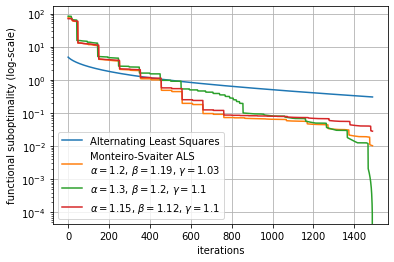

In [11]:
plt.semilogy(losses_als[:length] - f_opt, label="Alternating Least Squares")
plt.semilogy(flat_losses_catalyst_1[:length] - f_opt, label="Monteiro-Svaiter ALS\n$\\alpha = 1.2$, $\\beta = 1.19$, $\\gamma = 1.03$")
plt.semilogy(flat_losses_catalyst_2[:length] - f_opt, label=r"$\alpha = 1.3$, $\beta = 1.2$, $\gamma = 1.1$")
plt.semilogy(flat_losses_catalyst_3[:length] - f_opt, label=r"$\alpha = 1.15$, $\beta = 1.12$, $\gamma = 1.1$")

plt.xlabel('iterations')
plt.ylabel('functional suboptimality (log-scale)')
plt.legend()
plt.grid(True)

In [2]:
import pickle

with open('data/base_lam0.1.data', 'rb') as f:
    losses_als = pickle.load(f)

with open('data/L45_lam0.1.data', 'rb') as f:
    flat_losses_catalyst_1 = pickle.load(f)
    
with open('data/L45_lam0.1_0.data', 'rb') as f:
    flat_losses_catalyst_2 = pickle.load(f)
    
with open('data/L45_lam0.1_1.data', 'rb') as f:
    flat_losses_catalyst_3 = pickle.load(f)